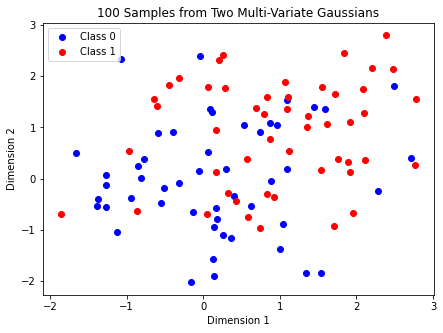

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance
from scipy.sparse.csgraph import minimum_spanning_tree

# Set the mean and covariance matrix for each Gaussian distribution
# mean1 = [1, 2, 3]
mean1 = [0, 0]

covariance1 = np.identity(2)

mean2 = [1, 1]
# covariance2 = np.array([[1, 0, 0], [0, 2, 0.5], [0, 0.5, 1]])

covariance2 = np.identity(2)




# Set the number of samples
n0 = 50
n1 = n0

# Generate random samples from the multivariate normal distributions
data1 = np.random.multivariate_normal(mean1, covariance1, n0)
data2 = np.random.multivariate_normal(mean2, covariance2, n1)

# Concatenate the datasets
dataset = np.concatenate([data1, data2])

# Shuffle the dataset
np.random.shuffle(dataset)

# Visualize the dataset (optional)
fig = plt.figure(figsize = (7, 5) )
ax = fig.add_subplot(111)
# ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], marker='o')
ax.scatter(data1[:, 0], data1[:, 1], marker='o', c='b', label="Class 0")
ax.scatter(data2[:, 0], data2[:, 1], marker='o', c = 'r', label = "Class 1")


ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_title("100 Samples from Two Multi-Variate Gaussians")
ax.legend()

plt.show()

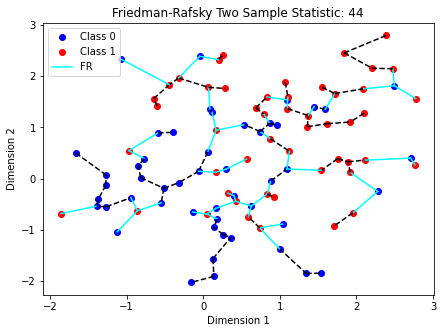

Friedman-Rafsky statistic =  44


In [18]:
FR_statistic =  0 

# Calculate pairwise distances

distances = distance.pdist(dataset)

# Create a square distance matrix
dist_matrix = distance.squareform(distances)

# Create a minimum spanning tree
mst = minimum_spanning_tree(dist_matrix)

# Extract edges from the minimum spanning tree
edges = np.array(np.where(mst.toarray() > 0)).T

# Plot the dataset and the minimum spanning tree
fig = plt.figure(figsize = (7, 5) )
ax = fig.add_subplot(111)
# ax.scatter(dataset[:, 0], dataset[:, 1],c='black', marker='o')
ax.scatter(data1[:, 0], data1[:, 1], marker='o', c='b', label = "Class 0")
ax.scatter(data2[:, 0], data2[:, 1], marker='o', c = 'r', label =  "Class 1")

for edge in edges:
    if dataset[edge[0]] in data1 and dataset[edge[1]] in data1:
        color = 'black'
        ax.plot(dataset[edge, 0], dataset[edge, 1], "k--")

    elif dataset[edge[0]] in data2 and dataset[edge[1]] in data2:
        color = 'black'
        ax.plot(dataset[edge, 0], dataset[edge, 1], "k--")

    else:
        color = 'cyan'
        if FR_statistic == 0:
            ax.plot(dataset[edge, 0], dataset[edge, 1], "cyan", label = 'FR')
        else:
            ax.plot(dataset[edge, 0], dataset[edge, 1], "cyan")

        FR_statistic  +=1



ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")

ax.set_title("Friedman-Rafsky Two Sample Statistic: " + str(FR_statistic))
ax.legend()
plt.show()
print("Friedman-Rafsky statistic = ",  FR_statistic )


In [3]:
Dp = 1 - FR_statistic * (n0 + n1)/ (2 * n0 * n1)

print("The Dp measure is, ", Dp)

The Dp measure is,  0.31999999999999995


In [4]:
p = n0 /(n0 + n1)
q = n1 / (n0 + n1)

up = 4 * p * q * Dp + (p-q)**2



val1 = 1 / 2 * ( up**(1/2)) 

print("Baye's error rate is between", 1/2 - val1, 1/2 -  1/2 * up )

Baye's error rate is between 0.217157287525381 0.34


In [5]:
# from scipy.stats import multivariate_normal

# # Assuming you have the generated dataset 'dataset' and the means and covariances for each class


# # Create multivariate normal distributions for each class
# class1_distribution = multivariate_normal(mean1, covariance1)
# class2_distribution = multivariate_normal(mean2, covariance2)

# # Estimate the Bayes error rate
# accuracy = (
#     class1_distribution.cdf(data1).mean() +  # Probability of correctly classifying Class 1
#     (  class2_distribution.cdf(data2)).mean()  # Probability of correctly classifying Class 2
# ) / 2

# print(accuracy)

# error_rate = 1 - accuracy



# print(f"Estimated Bayes error rate: { error_rate}")